In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0  21766      0 --:--:-- --:--:-- --:--:-- 21766
OK
36 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 36 not upgraded.
Need to get 4,274 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 144439 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.28.1_amd64.deb ...
Unpacking gcsfuse (0.28.1) ...
Setting up gcsfuse (0.28.1) ...


In [0]:
!mkdir /team55
!gcsfuse kaggle_planet /team55

Using mount point: /team55
Opening GCS connection...
Opening bucket...
Mounting file system...
File system has been successfully mounted.


In [0]:
!ls /team55/

ipykernel_launcher.py_plot.png	Predictive_model	  train_v2.csv
kaggle.json			sample_image_2.jpg	  train_v2_reduced.csv
planet_data_064.npz		sample_image_3.jpg	  Untitled1.ipynb
planet_data_064_test.npz	sample_image.jpg	  Untitled.ipynb
planet_data_064_train.npz	test-jpg		  VGG16_064.h5
planet_data_128.npz		test_v2_file_mapping.csv  vgg.py
planet_data_128_test.npz	train_automl.csv
planet_data_128_train.npz	train-jpg


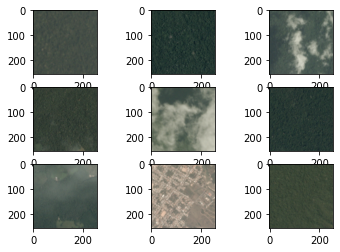

In [0]:
# plot the first 9 images in the planet dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/team55/test-jpg/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'test_' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [0]:
# make a prediction for a new image
from pandas import read_csv
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(mapping_csv):
	# create a set of all known tags
	labels = set()
	for i in range(len(mapping_csv)):
		# convert spaced separated tags into an array of tags
		tags = mapping_csv['tags'][i].split(' ')
		# add tags to the set of known labels
		labels.update(tags)
	# convert set of labels to a list to list
	labels = list(labels)
	# order set alphabetically
	labels.sort()
	# dict that maps labels to integers, and the reverse
	labels_map = {labels[i]:i for i in range(len(labels))}
	inv_labels_map = {i:labels[i] for i in range(len(labels))}
	return labels_map, inv_labels_map

# convert a prediction to tags
def prediction_to_tags(inv_mapping, prediction):
	# round probabilities to {0, 1}
	values = prediction.round()
	# collect all predicted tags
	tags = [inv_mapping[i] for i in range(len(values)) if values[i] == 1.0]
	return tags

# load and prepare the image
def load_image(testfile):
	# load the image
	img = load_img(testfile, target_size=(64, 64))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 64, 64, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example(inv_mapping):
	# load the image
	img = load_image(folder + 'test_' + str(i) + '.jpg')
	# predict the class
	result = model.predict(img)
	# map prediction to fie name
	name = test_csv['image_name'][i]
	output[name] = result[0]

# load the mapping file
output = dict()
filename = '/team55/train_v2.csv'
testfile = '/team55/test_v2.csv'
mapping_csv = read_csv(filename)
test_csv = read_csv(testfile)
# load model
model = load_model('/team55/VGG16_064.h5')
# create a mapping of tags to integers
_, inv_mapping = create_tag_mapping(mapping_csv)
# entry point, run the example
for i in range(len(test_csv)):
	run_example(inv_mapping)
print("Complete")

KeyboardInterrupt: ignored

In [0]:
CSV ="\n".join([k+','+','.join(map(str, v)) for k,v in output.items()]) 
with open("/team55/test_output.csv", "w") as file:
  file.write(CSV)